<a href="https://colab.research.google.com/github/l-e13/covidproject/blob/main/SCRIPTS/covid_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Script Name:** covid_eda.ipynb


**Project:** COVID-19 Twitter Sentiment Analysis

**Description:**
This script performs initial data preprocessing and exploratory data analysis (EDA) on the COVID-19 tweet data

Dependencies:
- google colab (for mounting google drive to pull data)
- pandas
- seaborn
- matplotlib

**Usage:**
This script should be executed before applying sentiment analysis to ensure that the dataset is cleaned and EDA has been performed.

In [1]:
# upload corona train.csv

from google.colab import files
import pandas as pd

# Upload file
uploaded = files.upload()

# Get the file name (first key in the uploaded dictionary)
file_name = list(uploaded.keys())[0]

# Load the CSV file
df = pd.read_csv(file_name, encoding='ISO-8859-1')

# Display first few rows
df.head()



Saving Corona_NLP_train.csv to Corona_NLP_train.csv


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [2]:
df.shape

(41157, 6)

In [ ]:
print(df.tail())

       UserName  ScreenName                      Location     TweetAt  \
41152     44951       89903  Wellington City, New Zealand  14-04-2020   
41153     44952       89904                           NaN  14-04-2020   
41154     44953       89905                           NaN  14-04-2020   
41155     44954       89906                           NaN  14-04-2020   
41156     44955       89907  i love you so much || he/him  14-04-2020   

                                           OriginalTweet           Sentiment  
41152  Airline pilots offering to stock supermarket s...             Neutral  
41153  Response to complaint not provided citing COVI...  Extremely Negative  
41154  You know itÂs getting tough when @KameronWild...            Positive  
41155  Is it wrong that the smell of hand sanitizer i...             Neutral  
41156  @TartiiCat Well new/used Rift S are going for ...            Negative  


In [ ]:
print(df.columns)

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')


In [ ]:
print(df.dtypes)

UserName          int64
ScreenName        int64
Location         object
TweetAt          object
OriginalTweet    object
Sentiment        object
dtype: object


In [3]:
# convert tweetat to datetime format
df['TweetAt'] = pd.to_datetime(df['TweetAt'], format='%d-%m-%Y')
print(df['TweetAt'].head())


0   2020-03-16
1   2020-03-16
2   2020-03-16
3   2020-03-16
4   2020-03-16
Name: TweetAt, dtype: datetime64[ns]


<ipython-input-8-6017c187db39>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_length.index, y=avg_length['Average Length'], palette="mako", order=sentiment_order)  # Access 'Average Length' column


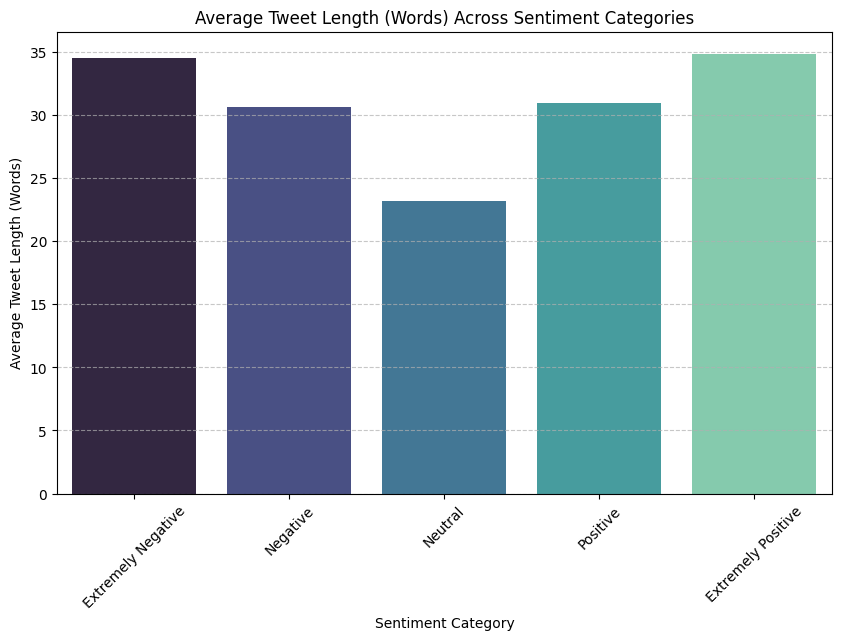

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df['TweetLength'] = df['OriginalTweet'].apply(lambda x: len(x.split()))  # Calculate tweet length
avg_length = df.groupby('Sentiment')['TweetLength'].mean().reset_index()  # Calculate average length per sentiment
avg_length.rename(columns={'Sentiment': 'Sentiment Category', 'TweetLength': 'Average Length'}, inplace=True)  # Rename columns

# arrange labels in logical order
sentiment_order = ["Extremely Negative", "Negative", "Neutral", "Positive", "Extremely Positive"]
avg_length = avg_length.set_index("Sentiment Category")
avg_length = avg_length.reindex(sentiment_order)

# barplot of avg tweet length by category
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_length.index, y=avg_length['Average Length'], palette="mako", order=sentiment_order)  # Access 'Average Length' column

plt.title("Average Tweet Length (Words) Across Sentiment Categories")
plt.xlabel("Sentiment Category")
plt.ylabel("Average Tweet Length (Words)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Sentiment
Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: count, dtype: int64


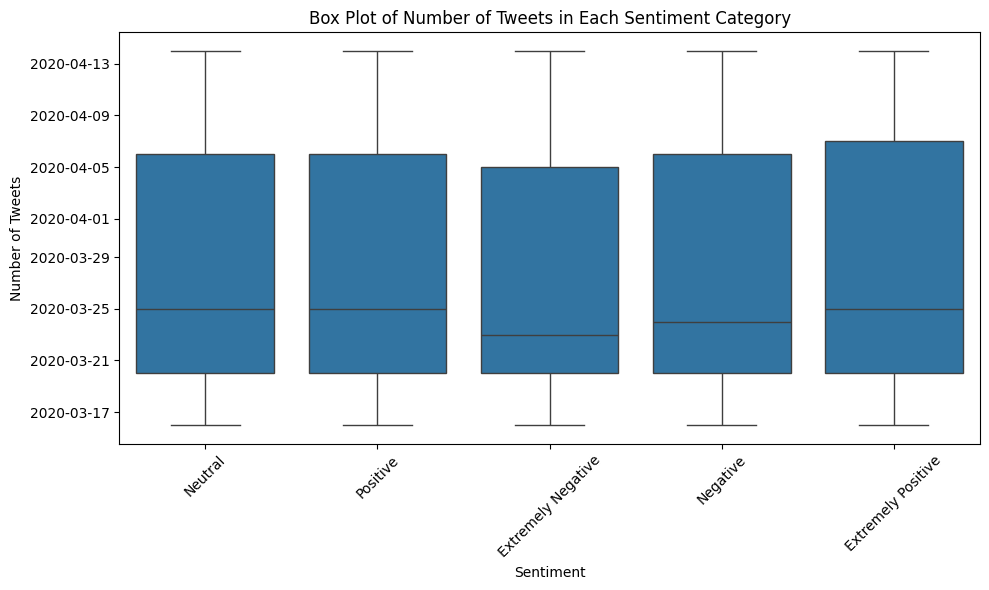

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


print(df['Sentiment'].value_counts())

# Box plot of number of tweets in each sentiment category
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sentiment', y='TweetAt', data=df)

# Set plot title and labels
plt.title('Box Plot of Number of Tweets in Each Sentiment Category')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')

# Show the plot with rotated x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
# List of US states and major cities (can expand as needed)
us_locations = [
    "Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware", "Florida",
    "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine",
    "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska",
    "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio",
    "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas",
    "Utah", "Vermont", "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming", "DC", "Washington DC",
    "New York City", "Los Angeles", "Chicago", "Houston", "Phoenix", "Philadelphia", "San Antonio", "San Diego",
    "Dallas", "San Jose", "Austin", "Jacksonville", "Fort Worth", "Columbus", "Charlotte", "San Francisco",
    "Indianapolis", "Seattle", "Denver", "Boston", "El Paso", "Nashville", "Detroit"
]

# Filter dataset to include only US locations
df_us = df[df["Location"].str.contains('|'.join(us_locations), case=False, na=False)]

# Display the first few rows of the filtered dataset
print(df_us.head())

    UserName  ScreenName        Location    TweetAt  \
13      3812       48764     Chicago, IL 2020-03-16   
15      3814       48766  Houston, Texas 2020-03-16   
19      3818       48770      Denver, CO 2020-03-16   
26      3825       48777  Ketchum, Idaho 2020-03-16   
28      3827       48779    New York, NY 2020-03-16   

                                        OriginalTweet Sentiment  TweetLength  
13  Me: I don't need to stock up on food, I'll jus...  Positive           20  
15  Lines at the grocery store have been unpredict...  Positive           31  
19  For those who aren't struggling, please consid...  Positive           31  
26  In preparation for higher demand and a potenti...  Negative           28  
28  Do you see malicious price increases in NYC? T...  Negative           40  


In [11]:
df_us.shape

(7224, 7)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
<ipython-input-12-ae5613ed9ed9>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_states["Location"], x=top_states["Tweet Count"], palette="viridis")


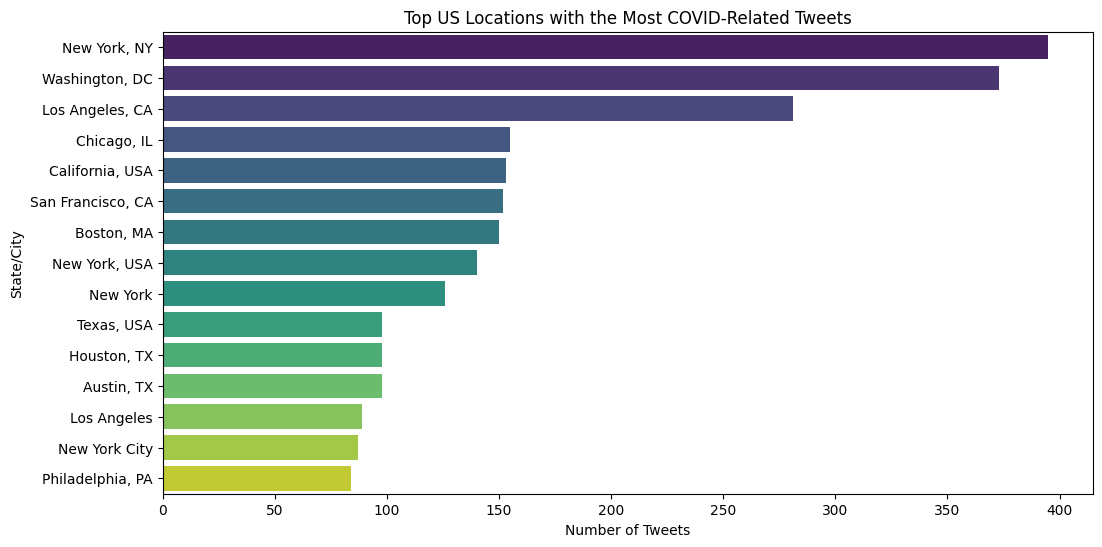

<ipython-input-12-ae5613ed9ed9>:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_sentiment_states["Location"], x=top_sentiment_states["Average Sentiment Score"], palette="coolwarm")


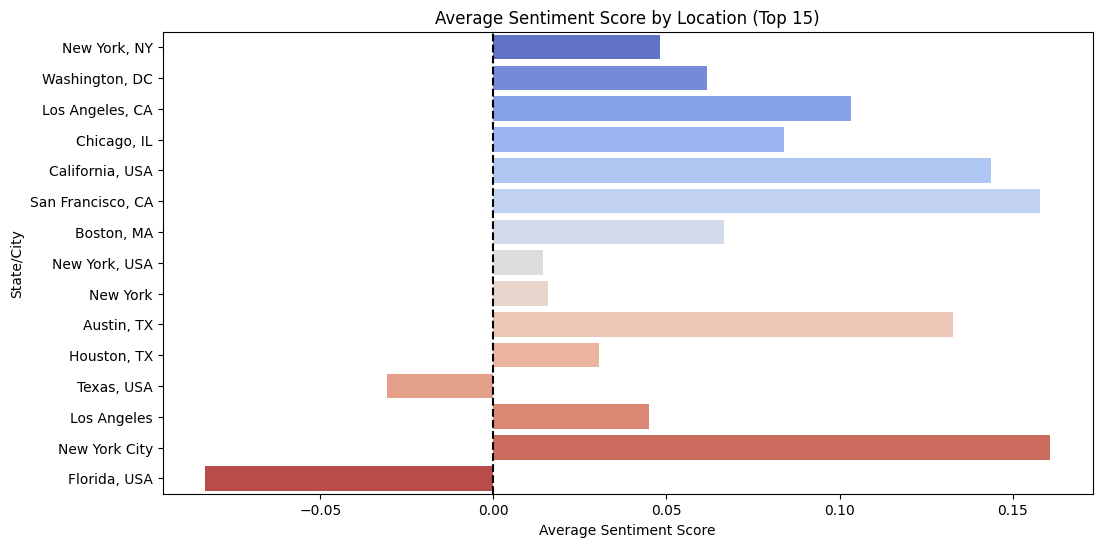

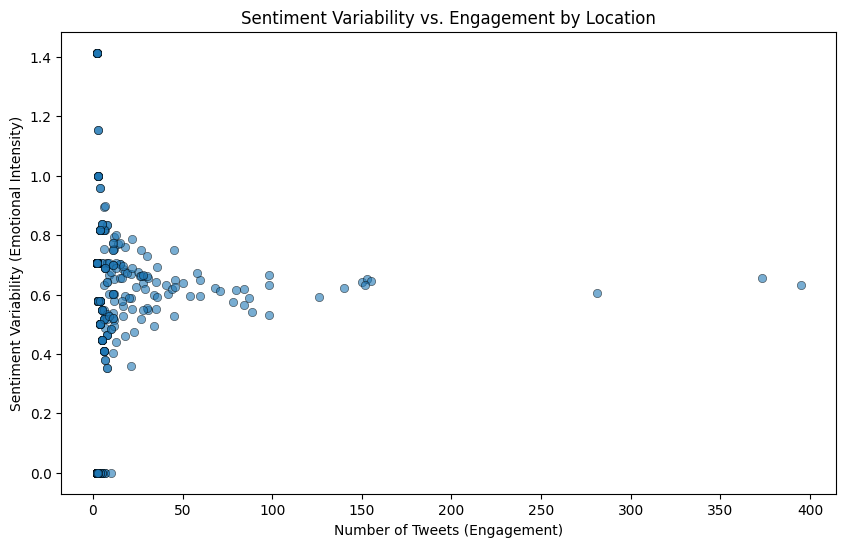

Data is now filtered for US locations. VADER sentiment scores are calculated. If you have state-level shutdown severity data, we can integrate it for further correlation analysis.


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Ensure VADER is available
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()


# Compute VADER sentiment scores for each tweet
df["VADER Score"] = df["OriginalTweet"].apply(lambda tweet: sia.polarity_scores(str(tweet))["compound"])

# Classify into sentiment categories based on VADER score
def classify_sentiment(score):
    if score >= 0.5:
        return "Positive"
    elif score <= -0.5:
        return "Negative"
    else:
        return "Neutral"

df["VADER Sentiment"] = df["VADER Score"].apply(classify_sentiment)

# Convert sentiment labels to numerical scores for analysis
sentiment_map = {"Negative": -1, "Neutral": 0, "Positive": 1}
df["Sentiment Score"] = df["VADER Sentiment"].map(sentiment_map)

# US states and major cities for filtering
us_locations = [
    "Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware", "Florida",
    "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine",
    "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska",
    "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio",
    "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas",
    "Utah", "Vermont", "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming", "DC", "Washington DC",
    "New York City", "Los Angeles", "Chicago", "Houston", "Phoenix", "Philadelphia", "San Antonio", "San Diego",
    "Dallas", "San Jose", "Austin", "Jacksonville", "Fort Worth", "Columbus", "Charlotte", "San Francisco",
    "Indianapolis", "Seattle", "Denver", "Boston", "El Paso", "Nashville", "Detroit"
]

# Filter only US locations
df_us = df[df["Location"].str.contains('|'.join(us_locations), case=False, na=False)]

# Aggregate data: Count tweets per location and calculate average sentiment
location_tweet_counts = df_us["Location"].value_counts().reset_index()
location_tweet_counts.columns = ["Location", "Tweet Count"]

location_sentiment = df_us.groupby("Location")["Sentiment Score"].mean().reset_index()
location_sentiment.columns = ["Location", "Average Sentiment Score"]

# Merge both datasets
location_analysis = pd.merge(location_sentiment, location_tweet_counts, on="Location")

# Compute sentiment variability (spread of emotions per location)
location_analysis["Sentiment Variability"] = df_us.groupby("Location")["Sentiment Score"].std().reset_index(drop=True)

# ======= 📊 PLOTTING STARTS =======

# 🔹 1. Top states producing the most COVID-related tweets
plt.figure(figsize=(12, 6))
top_states = location_tweet_counts.head(15)  # Top 15 locations
sns.barplot(y=top_states["Location"], x=top_states["Tweet Count"], palette="viridis")
plt.xlabel("Number of Tweets")
plt.ylabel("State/City")
plt.title("Top US Locations with the Most COVID-Related Tweets")
plt.show()

# 🔹 2. Average Sentiment Score per State/City
top_sentiment_states = location_analysis.nlargest(15, "Tweet Count")  # Top 15 by tweet count
plt.figure(figsize=(12, 6))
sns.barplot(y=top_sentiment_states["Location"], x=top_sentiment_states["Average Sentiment Score"], palette="coolwarm")
plt.xlabel("Average Sentiment Score")
plt.ylabel("State/City")
plt.title("Average Sentiment Score by Location (Top 15)")
plt.axvline(x=0, color="black", linestyle="--")  # Neutral reference line
plt.show()

# 🔹 3. Sentiment Variability vs. Engagement (Shutdown Correlation)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=location_analysis["Tweet Count"],
    y=location_analysis["Sentiment Variability"],
    alpha=0.6,
    edgecolor="black"
)
plt.xlabel("Number of Tweets (Engagement)")
plt.ylabel("Sentiment Variability (Emotional Intensity)")
plt.title("Sentiment Variability vs. Engagement by Location")
plt.show()

# ======= 📊 PLOTTING ENDS =======

# 🚀 Ready for Shutdown Protocol Analysis
print("Data is now filtered for US locations. VADER sentiment scores are calculated. If you have state-level shutdown severity data, we can integrate it for further correlation analysis.")
